# なんでも小さく見える画像の合成

ライブラリのインポート

In [1]:
import os
import platform
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
use_os = platform.system()

if(use_os == "Windows"):
    dir_connect = "\\"
else:
    dir_connect = "/"

ファイルの読み込み

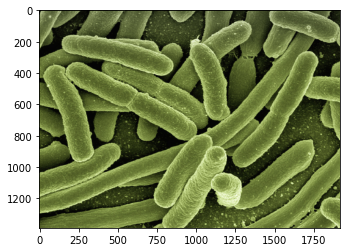

In [3]:
parent_dir = os.getcwd()
# 画像名を入力
pre_image_name = "sample1.jpg"
pre_image_dir = parent_dir + dir_connect + "pre_image" + dir_connect + pre_image_name

if(os.path.exists(pre_image_dir)):
   pre_array_obj = plt.imread(pre_image_dir)
   plt.imshow(pre_array_obj)

else:
   print("画像が存在しません．")
   sys.exit()

尺度の色を選ぶ，画像のサイズを調べる

画像のサイズ：(1388, 1920)
尺度画像のサイズ：(720, 1280)


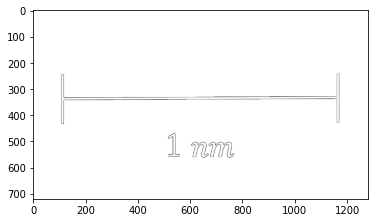

In [4]:
# 黒色なら"b", 白色なら"h"を入力
scale_color = "h"

if(scale_color == "h"):
    scale_image_name = "scale1.jpeg"
elif(scale_color == "b"):
    scale_image_name = "scale2.jpeg"

scale_dir = parent_dir + dir_connect + "scale_image" + dir_connect + scale_image_name


img1 = cv2.imread(pre_image_dir)
img2 = cv2.imread(scale_dir)

img_high, img_width = img1.shape[:2]
scale_high, scale_width = img2.shape[:2]

print("画像のサイズ：({}, {})".format(img_high, img_width))
print("尺度画像のサイズ：({}, {})".format(scale_high, scale_width))


pre_array_obj2 = plt.imread(scale_dir)
plt.imshow(pre_array_obj2)

尺度画像のリサイズ，出力先の作成

In [5]:
after_scale_high = img_high//4
after_scale_width = (after_scale_high*scale_width)//scale_high

pre_img3 = cv2.imread(scale_dir) 
img3 = cv2.resize(pre_img3, (after_scale_high, after_scale_width))

after_image_dir = parent_dir + dir_connect + "after_image" + dir_connect + "af_" +pre_image_name

画像の合成

In [7]:
after_image = img1
after_image_dir = parent_dir + dir_connect + "after_image" + dir_connect + "af_" +pre_image_name

y_offset = img_high - after_scale_high
x_offset = img_width - after_scale_width

print("img_high = {}, img_width = {}".format(img_high, img_width))
print("scale_high = {}, scale_width = {}".format(scale_high, scale_width))
print("after_scale_high = {}, after_scale_width = {}".format(after_scale_high, after_scale_width))

img3 = cv2.resize(pre_img3, (100, 100))
after_image[0 : after_scale_high, 0 : after_scale_width] = img3
# after_image[y_offset : y_offset + after_scale_high, x_offset : x_offset + after_scale_width] = img3
# cv2.imwrite(after_image_dir, after_image)

img_high = 1388, img_width = 1920
scale_high = 720, scale_width = 1280
after_scale_high = 347, after_scale_width = 616


ValueError: could not broadcast input array from shape (100,100,3) into shape (347,616,3)